<center>
    <u><font size="36">Homework 4</font></u>
    <h2>Rebecca Hinrichs</h2>
    <h4>MATH 4301 -- SPRING 2023</h4>
</center>

---
---

In [1]:
# Import numerical computation libraries
import math
import numpy as np
import scipy as sp
from scipy.optimize import bisect, fsolve, newton 

# Import graphic libraries
from numpy import linspace, meshgrid
import matplotlib.pyplot as plt
from matplotlib import cm

# Set back-end display options
import warnings
warnings.filterwarnings("ignore")
np.set_printoptions(precision = 4)

<center><br>Questions are from <b>Problem Set 4.1</b> in <br><i>Numerical Methods in Engineering with Python 3</i> by Jaan Kiusalaas</center>

---
<center><h2>Question 23</h2></center>
<br>
Determine the coordinates of the two points where the circles $(x-2)^2 + y^2 = 4$ and $x^2 + (y-3)^2 = 4$ intersect. Start by estimating the locations of the points from a sketch of the circles, and then use the Newton-Raphson method to compute the coordinates.<br><br>

In [2]:
## FUNCTIONS FOR APPLICATION OF NEWTON=RAPHSON METHOD
''' Textbook Modules
'''
import numpy as np
import math
def NewtonRaphson2(f, x, tol=1.0e-9):
    import sys
    def err(string):
        print(string)
        # input('Press return to exit')
        sys.exit(0)
    def swapRows(v,i,j):
        if len(v.shape) == 1:
            v[i],v[j] = v[j],v[i]
        else: v[[i,j],:] = v[[j,i],:]  
    def swapCols(v,i,j):
        v[:,[i,j]] = v[:,[j,i]]
    def gaussPivot(a,b,tol=1.0e-12):
        n = len(b)
        s = np.zeros(n) # Set up scale factors
        for i in range(n):
            s[i] = max(np.abs(a[i,:]))
        for k in range(0,n-1):
          # Row interchange, if needed
            p = np.argmax(np.abs(a[k:n,k])/s[k:n]) + k
            if abs(a[p,k]) < tol: err('\nMatrix is singular\n')
            if p != k:
                swapRows(b,k,p)
                swapRows(s,k,p)
                swapRows(a,k,p)
            for i in range(k+1,n):  # Elimination
                if a[i,k] != 0.0:
                    lam = a[i,k]/a[k,k]
                    a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
                    b[i] = b[i] - lam*b[k]
            if abs(a[n-1,n-1]) < tol: err('\nMatrix is singular\n')
            b[n-1] = b[n-1]/a[n-1,n-1]  # Back substitution
            for k in range(n-2,-1,-1):
                b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
        return b
    def jacobian(f, x):
        h = 1.0e-4
        n = len(x)
        jac = np.zeros((n,n))
        f0 = f(x)
        for i in range(n):
            temp = x[i]
            x[i] = temp + h
            f1 = f(x)
            x[i] = temp
            jac[:,i] = (f1 - f0)/h
        return jac,f0
    for i in range(100):
        jac,f0 = jacobian(f,x)
        if math.sqrt(np.dot(f0,f0)/len(x)) < tol:
            return x
        dx = gaussPivot(jac,-f0)
        x = x + dx
        if math.sqrt(np.dot(dx,dx)) \
        < tol*max(max(abs(x)),1.0): return x
    print('\nToo many iterations\n')

## FUNCTIONS FOR APPLICATION OF NEWTON=RAPHSON METHOD
''' Homemade Modules for 2-dim system of equations (f)
'''
def derivative(f1, var, h=1e-5):
    return (f1([var[0] + h, var[1]]) - f1([var[0] - h, var[1]])) / (2 * h), \
           (f1([var[0], var[1] + h]) - f1([var[0], var[1] - h])) / (2 * h)
def newton_raphson(initial_guess, fn, tol=1e-6, max_iter=1000):
    x = initial_guess
    for _ in range(max_iter):
        fx, gx = fn(x)                    # separate equations for differentiation
        f_x = np.array([fx, gx])
        J = np.array([[derivative(fn, x)[0][0], derivative(fn, x)[0][1]],  # Jacobian matrix
                      [derivative(fn, x)[1][0], derivative(fn, x)[1][1]]])
        delta = np.linalg.solve(J, -f_x)  # update delta :: J*delta=-f_x
        x[0] += delta[0]    # update x using Newton-Raphson method
        x[1] += delta[1]    # update y using Newton-Raphson method
        if np.linalg.norm(delta) < tol: return x
        if _ == (max_iter-1): 
            print("\nNewton-Raphson method failed to converge!")

## FUNCTION FOR PLOTTING CIRCLES
def make_circle_plot(x_data, y_data):
    circle1 = plt.Circle((2, 0), 2, color='magenta', fill=False, label='Circle A')
    circle2 = plt.Circle((0, 3), 2, color='green', fill=False, label='Circle B')
    fig, ax = plt.subplots()
    ax.set_aspect(1)
    ax.add_patch(circle1)
    ax.add_patch(circle2)
    ax.scatter(x_data, y_data, color='red', label='Intersection')
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid()
    plt.show();

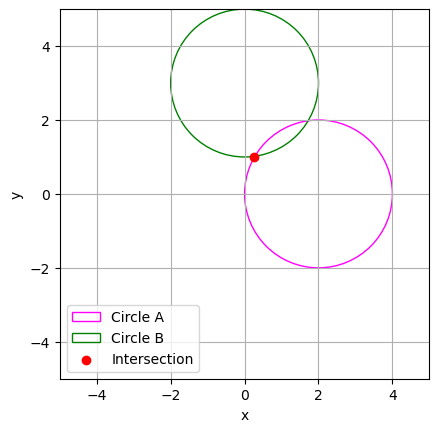


A Solution is:  [0.2794 1.0196] 

- - - - now using textbook modules - - - -

A Solution is:  [0.2794 1.0196] 



In [3]:
## <<--- ANSWER THE QUESTION, CLAIRE --->>
def f_arr(x):
    f0 = np.zeros(len(x))
    f0[0] = (x[0] - 2)**2 + x[1]**2 - 4  # eq of circle 1 :: f(x,y)
    f0[1] = x[0]**2 + (x[1] - 3)**2 - 4  # eq of circle 2 :: g(x,y)
    return f0                            # 1x2 array :: [f(x,y), g(x,y)]
print()
x = np.array([0.25,1])  # initial guess
make_circle_plot(x[0], x[1])
inter_pt = newton_raphson(x, f_arr)
print("\nA Solution is: ", inter_pt, "\n")
print("- - - - now using textbook modules - - - -")
inter_pt = NewtonRaphson2(f_arr, x)
print("\nA Solution is: ", inter_pt, "\n")

---
<center><h2>Question 24</h2></center>

The equations

$$
\sin x + 3 \cos x - 2 = 0
$$
$$
\cos x - \sin y + 0.2 = 0
$$

have a solution in the vicinity of the point $(1,1)$. Use the Newton-Raphson method to refine the solution.
<br><br>

In [4]:
## FUNCTION FOR PLOTTING DIFF-DIM FREQ PLOTS
def make_f1g2_plot(x_data, y_data, f, g):
    plt.figure(figsize=(8,4))
    x_vals = np.linspace(-2 * np.pi, 2 * np.pi, 100)
    f0_vals = f(x_vals)  # there is no y
    y_vals = np.linspace(-2 * np.pi, 2 * np.pi, 100)
    g0_vals = g(x_vals, y_vals)
    plt.plot(x_vals, f0_vals, label='f(x)')
    plt.plot(y_vals, g0_vals, label='g(x,y)')
    plt.xlabel('x and y')
    plt.ylabel('f(x) and g(x,y)')
    plt.legend()
    plt.grid()
    plt.show();

In [5]:
## FUNCTIONS FOR APPLICATION OF NEWTON=RAPHSON METHOD
''' Homemade Modules for diff-dim system of equations (f,g)
'''
def derivative2(g1, var1, var2, h=1e-5):
    return (g1(var1 + h, var2) - g1(var1 - h, var2)) / (2*h), \
           (g1(var1, var2 + h) - g1(var1, var2 - h)) / (2*h)
def newton_raphson2(initial_guess, f, g, tol=1e-6, max_iter=1000):
    x, y = initial_guess
    for _ in range(max_iter):
        fxy, gxy = np.array([x,0]), np.array([x,y])
        f_x = np.array([f(x), g(x,y)])
        J = np.array([[derivative2(f, x,0)[0], derivative2(f, x,0)[1]],  # Jacobian matrix
                      [derivative2(g, x,y)[0], derivative2(g, x,y)[1]]])
        delta = np.linalg.solve(J, -f_x)  # update delta :: J*delta=-f_x
        x += delta[0]    # update x using Newton-Raphson method
        y += delta[1]    # update y using Newton-Raphson method
        if np.linalg.norm(delta) < tol: return x,y
        if _ == (max_iter-1): 
            print("\nNewton-Raphson method failed to converge!")

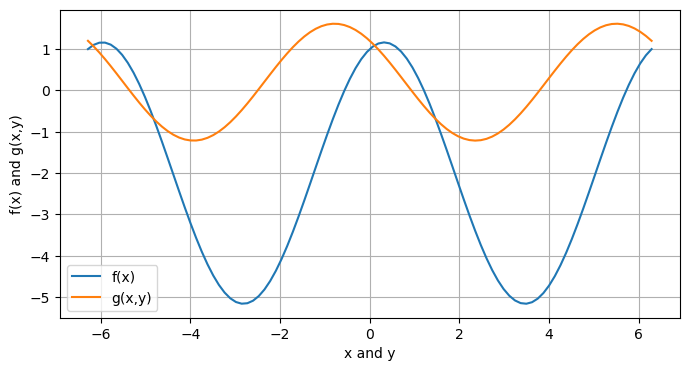


A Solution is:  (1.2078276781892558, 0.5884243074175859) 



In [6]:
## <<--- ANSWER THE QUESTION, CLAIRE --->>
def f(x,y=0): return np.sin(x) + 3*np.cos(x) - 2
def g(x,y): return np.cos(x) - np.sin(y) + 0.2
def f_arr(x):  # the system of equations
    f0 = np.zeros(len(x))
    f0[0] = np.sin(x[0]) + 3*np.cos(x[0]) - 2  # eq 1 :: f(x)
    f0[1] = np.cos(x[0]) - np.sin(x[1]) + 0.2  # eq 2 :: g(x,y)
    return f0                            # 1x2 array :: [f(x), g(x,y)]
print()
x = np.array([1,1])  # initial guess
make_f1g2_plot(x[0], x[1], f, g)
inter_pt = newton_raphson2(x, f, g)
print("\nA Solution is: ", inter_pt, "\n")

<br>Since the first equation always has $y=0$, we have to compute the derivative with respect to $x$ and code the derivative with respect to $y=0$ in order to find the solution. The textbook modules would also need to be modified and/or (more than likely) my functions to be returning a list rather than a tuple like this, but since I already modified my own (shorter) code to get to our solution, we can move on to the next ☺

---
<center><h2>Question 25</h2></center>

Use any method to find <i>all</i> real solutions of the simultaneous equations

$$
\tan x - y = 1
$$
$$
\cos x - 3 \sin y = 0
$$

in the region $0 \leq x \leq 1.5$.
<br><br>

In [7]:
## FUNCTION FOR PLOTTING SAME-DIM FREQ PLOTS
def make_fg_plot(x_data, y_data, f, g):
    plt.figure(figsize=(8,4))
    x_vals = np.linspace(-2 * np.pi, 2 * np.pi, 100)
    y_vals = np.linspace(-2 * np.pi, 2 * np.pi, 100)
    f0_vals = f(x_vals, y_vals)
    g0_vals = g(x_vals, y_vals)
    plt.plot(x_vals, f0_vals, label='f(x,y)')
    plt.plot(y_vals, g0_vals, label='g(x,y)')
    plt.xlabel('x and y')
    plt.ylabel('f(x,y) and g(x,y)')
    plt.legend()
    plt.grid()
    plt.show();

In [8]:
## FUNCTIONS FOR APPLICATION OF NEWTON=RAPHSON METHOD
''' Homemade Modules for same-dim system of equations (f)
'''
def derivative(g1, var1, var2, h=1e-5):  # same as 1st just chilled on the indexing
    return (g1(var1 + h, var2) - g1(var1 - h, var2)) / (2*h), \
           (g1(var1, var2 + h) - g1(var1, var2 - h)) / (2*h)
def newton_raphson(initial_guess, f, g, tol=1e-6, max_iter=1000):
    x, y = initial_guess
    for _ in range(max_iter):
        f_x = np.array([f(x,y), g(x,y)])
        J = np.array([[derivative(f, x,y)[0], derivative(f, x,y)[1]],  # Jacobian matrix
                      [derivative(g, x,y)[0], derivative(g, x,y)[1]]])
        delta = np.linalg.solve(J, -f_x)  # update delta :: J*delta=-f_x
        x += delta[0]    # update x using Newton-Raphson method
        y += delta[1]    # update y using Newton-Raphson method
        if np.linalg.norm(delta) < tol: return x,y
        if _ == (max_iter-1): return x,y

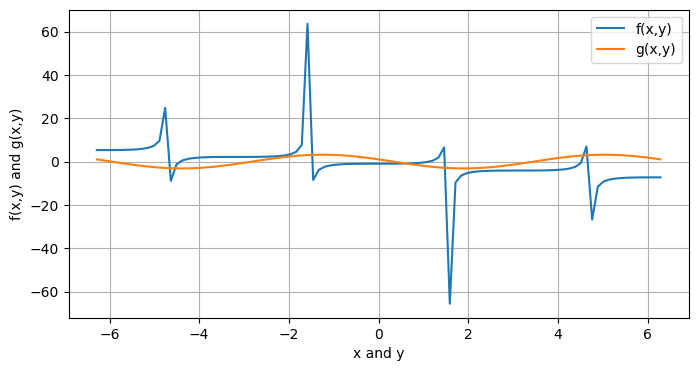


A Solution is:  [0.8816 0.2136]

A Solution is:  [1.3294 3.0618]

A Solution is:  [1.4749 9.3928]

A Solution is:  [ 1.4973 12.5908]

- - - - we found 4 real solutions - - - -

ALL SOLUTIONS :: [array([0.8816, 0.2136]), array([1.3294, 3.0618]), array([1.4749, 9.3928]), array([ 1.4973, 12.5908])]



In [9]:
## <<--- ANSWER THE QUESTION, CLAIRE --->>
def f(x,y): return np.tan(x) - y - 1
def g(x,y): return np.cos(x) - 3*np.sin(y)
print()
x = np.array([1,1])  # initial guess
make_fg_plot(x[0], x[1], f, g)

# Search for ALL REAL SOLUTIONS in the range :: [0, 1.5]
found_pts, found_x, max_iter = list(), list(), 1000
inter_pt = np.round(newton_raphson(x, f, g),4)
print("\nA Solution is: ", inter_pt)
found_pts.append(inter_pt)
found_x.append(inter_pt[0])
while max_iter > 0:
    x = np.array([np.random.rand()*1.5,np.random.rand()*5])
    try:
        inter_pt = np.round(newton_raphson(x, f, g),4)
        if 0 <= inter_pt[0] <= 1.5:  # range :: [0, 1.5]
            if inter_pt[0] not in found_x: # <<-- that took forEVER to figure out
                found_pts.append(inter_pt)
                found_x.append(inter_pt[0])
                print("\nA Solution is: ", inter_pt)
        max_iter -= 1
    except:
        max_iter -= 1
print(f'\n- - - - we found {len(found_x)} real solutions - - - -\n')
print(f'ALL SOLUTIONS :: {[pt for pt in found_pts]}\n')

By modifying our original code, we iterated random `x` float values in the range $(0, 1.5)$ and only accepted intersection points between the two equations which met the Newton-Raphson convergence method. We used the derivative of both equations as 

---
<center><h2>Question 26</h2></center>

The equation of a circle is
$$
(x-a)^2 + (y-b)^2 = R^2
$$
where $R$ is the radius and $(a,b)$ are the coordinates of the center. If the coordinates of three points on the circle are

|  |  |  |  |  |
| --- | --- | --- | --- | --- |
| $x$ || 8.21 | 0.34 | 5.96 | 
| $y$ || 0.00 | 6.62 | -1.12 | 

determine $R$, $a$, and $b$.<br><br>

In [105]:
## FUNCTION FOR PLOTTING CIRCLES
def make_circle_plot2(x_data, y_data, ctr=(0,0), radius=1):
    circle = plt.Circle(ctr, radius, color='black', fill=False, label='Circle A')
    fig, ax = plt.subplots()
    ax.set_aspect(1)
    ax.add_patch(circle)
    ax.scatter(x_data[0], y_data[0], color='red', label='Point 1')
    ax.scatter(x_data[1], y_data[1], color='blue', label='Point 2')
    ax.scatter(x_data[2], y_data[2], color='green', label='Point 3')
    plt.xlim(-2, 12)
    plt.ylim(-2, 12)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Equation of a Circle with a,b,R")
    plt.legend()
    plt.grid()
    plt.show();


The solutions are

		a = 4.830105654297453
		b = 3.9699216766345855
		R = 5.213824307236019




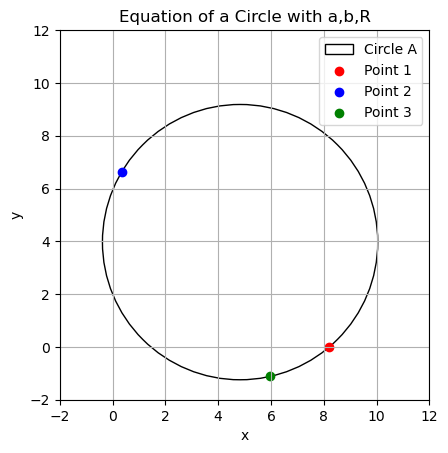

In [107]:
## <<--- ANSWER THE QUESTION, CLAIRE --->>
from scipy import optimize
def equations(y): # system of equations using given points x = [x,y] and guesstimates y = [a,b,R]
    eq = np.zeros(3)
    for i in range(3):
        eq[i] = (x[i,0] - y[0])**2 + (x[i,1] - y[1])**2 - y[2]**2  # where x = [x,y] and y = [a,b,R]
    return eq
x = np.array([[8.21, 0.00],  # we were given 3 (x,y) pairs
              [0.34, 6.62],
              [5.96, -1.12]])
initial_guess = np.array([(x[0,0]+x[1,0])/2, (x[0,1]+x[1,1])/2, 1])
roots = optimize.root(x0=initial_guess, fun=equations)
a, b, R = roots.x
print(f'\nThe solutions are\n\n\t\ta = {a}\n\t\tb = {b}\n\t\tR = {R}\n\n')
make_circle_plot2(x[:,0], x[:,1], 
                  ctr=(a,b), 
                  radius=R)

--- 
--- 

<center><h2>Analysis</h2></center><br><br>

In this assignment, we learned how to solve several different kinds of systems of linear equations, by using Taylor series expansion and Newton's method of approximating the solution by using the Jacobian matrix, in the form of:
<br>

$$
\begin{bmatrix}
f_x & f_y \\
g_x & g_y
\end{bmatrix}
\begin{bmatrix}
\Delta x_n \\
\Delta y_n
\end{bmatrix} = -
\begin{bmatrix}
f \\
g
\end{bmatrix}
$$
at the point $(x_n, y_n)$ in hopes of finding the roots where $f(x_{n+1}, y_{n+1}) = 0$ and $g(x_{n+1}, y_{n+1}) = 0$.  
<br>
The method that the Newton-Raphson method uses is well-suited to converge when finding a solution to one or two variables for a system of equations, but when we get into complex roots such as what we were looking for in this problem, the coding can get very, very complicated for a still-learning-how-to-code schoolgirl like myself. But it's been a truly satisfying challenge! I believe the important takeaway is how the method works by iterating small incremental guesses along a function until finding convergence using the Jacobian matrix, where a system of equations generates a transformation matrix $A$ using forward and backward substitution through partial pivoting (Gaussian elimination), reducing the operation counts from $O(n^3)$ to $O(n^2)$ before performing LU decomposition (used by NumPy's `linalg.solve` method). The Newton-Raphson process used in SciPy's `optimize.newton` method makes use of pivoting in order to handle instances where $f'$ approaches zero and implements the Secant method to attempt to combat it, which we used throughout this assignment to demonstrate, but may still diverge if our initial guess is too far from a real root. However if we're close enough, the algorithm making incremental steps respective of the differentiation of each variable through the system of equations by iterating through small finite differences and typically eventually converges. It's a powerful tool! But a real drawback is having to be close to the initial guess in order to avoid zeroes. In our homemade modules, we were able to see the iterative nature the method uses by adding a small `h` component to try to keep us from a true zero at each of `max_iter` iterations. The technique is super useful, and seems like it's been replicated conceptually all over computing and statistics- like adding alpha to a Bayesian problem. Once the problem of zero is avoided (`h`) or sidestepped (`max_iter`), we can be sure the method will take us to the solution at the point in question. Additionally, we learned that if we were faced with a more complex, multi-variable system, we can first decompose the matrix A in the system of equations and solve for x far more efficiently by iterating right-hand vectors (this is what SciPy's `optimize.root` method does). All in all, we've witnessed firsthand why the magnitudinal effect on computational performance is so significant as dimensionality increases in a data set, and why high performance computing is such an important endeavor!